<a href="https://colab.research.google.com/github/Guhan2348519/ADVANCED-ML-tasks/blob/main/2348519_decision_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

The libraries imported in the provided code are used for data manipulation and analysis (pandas), implementing a decision tree classifier (DecisionTreeClassifier), exporting decision tree visualization (export_graphviz), displaying images in the notebook (IPython.display.Image), generating and visualizing graph data structures (pydotplus), performing Principal Component Analysis (PCA), splitting data into training and testing sets (train_test_split), and evaluating model accuracy (accuracy_score).

In [27]:
# Load the Iris flower dataset
iris_data = pd.read_excel("/content/drive/MyDrive/data/Iris.xlsx")


dataset contains:
Id: A unique identifier for each flower specimen
SepalLengthCm: The length of the sepal, in centimeters
SepalWidthCm: The width of the sepal, in centimeters
PetalLengthCm: The length of the petal, in centimeters
PetalWidthCm: The width of the petal, in centimeters
Species: The species of the Iris flower (setosa, versicolor, or virginica)

In [28]:
iris_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
iris_data.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [30]:
iris_data.shape

(150, 6)

In [31]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


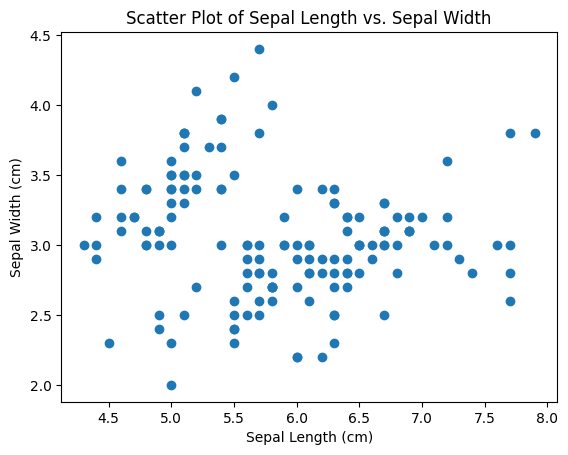

In [39]:
import matplotlib.pyplot as plt
plt.scatter(iris_data["SepalLengthCm"], iris_data["SepalWidthCm"])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Scatter Plot of Sepal Length vs. Sepal Width")
plt.show()

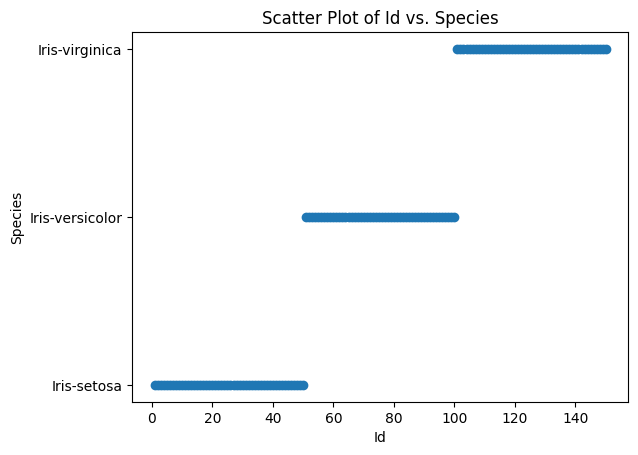

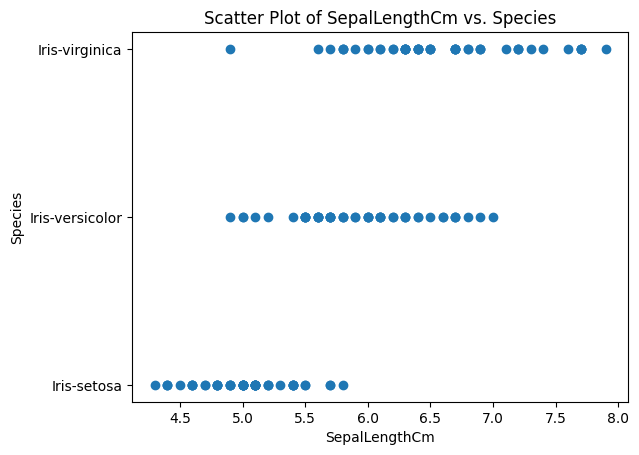

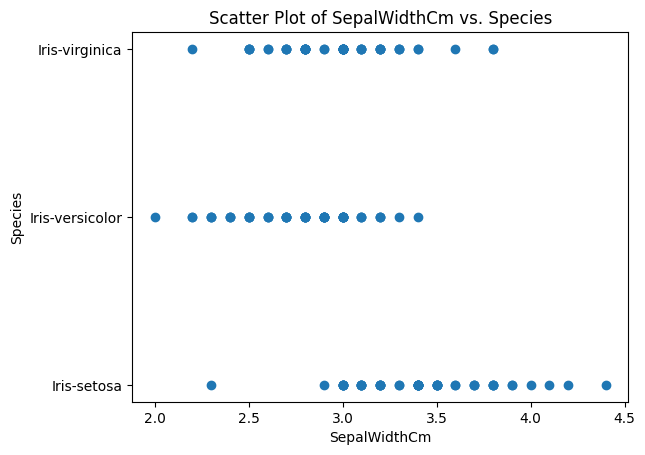

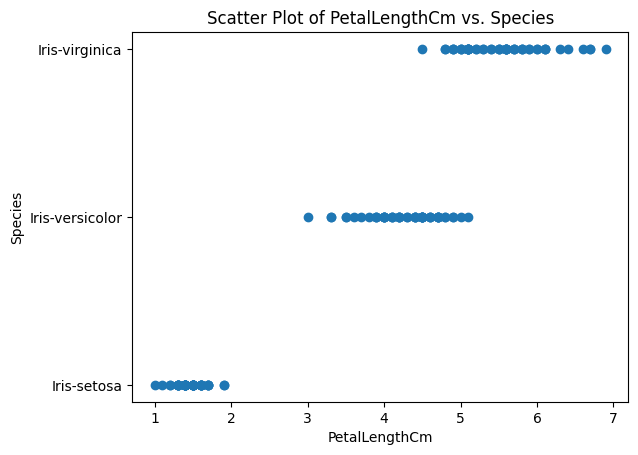

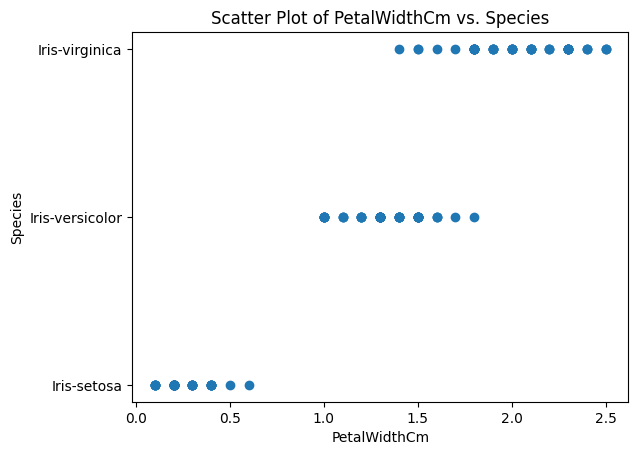

In [44]:
for feature in iris_data.columns[:-1]:
    plt.figure()
    plt.scatter(iris_data[feature], iris_data["Species"])
    plt.xlabel(feature)
    plt.ylabel("Species")
    plt.title("Scatter Plot of {} vs. Species".format(feature))
    plt.show()

In [12]:
features = iris_data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
target_labels = iris_data["Species"]


 The dataset is then split into features (X) comprising the sepal and petal measurements, and the target labels (y) consisting of the different species of Iris flowers.

Data Splitting: The dataset is split into training and testing sets using 80% for training and 20% for testing.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features, target_labels, test_size=0.2, random_state=42)

In [35]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


Principal Component Analysis (PCA): PCA is applied for dimensionality reduction, reducing the feature space to two dimensions.

In [15]:
clf = DecisionTreeClassifier()
clf.fit(X_train_pca, y_train)


DecisionTreeClassifier()



Model Training: A Decision Tree Classifier is trained on the training data after PCA transformation.


In [42]:
dot_data = export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph_png = graph.create_png()
Image(graph_png)
y_pred = clf.predict(X_test_pca)


Graph Visualization: The tree structure of the trained Decision Tree Classifier is visualized using graphviz and displayed as an image.


In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


Model Evaluation: The accuracy of the model is computed using the testing data, and the result is printed, showing an accuracy of approximately 96.67%.

In conclusion, the code performs data loading, preprocessing, splitting, dimensionality reduction using PCA, model training, visualization the Decision Tree Classifier, and model evaluation. Based on the accuracy score obtained, the model shows strong performance in predicting the species of Iris flowers.